In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:32:32,453 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:32:32,456 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:32:32,457 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:32:32,462 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:32:32,463 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:32:32,475 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:32:32,914 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:32:32,918 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:32:32,920 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:32:32,920 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:32:32,921 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:32:32,922 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:32:32,923 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:32:32,925 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:32:33,415 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:32:33,564 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:32:33,566 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:32:33,567 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:32:33,572 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:32:34,103 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [5]:
seg_id = 864691136311791677
seg_id = 864691135348272855
seg_id = 864691135771629819

In [6]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

Decompressing Neuron in minimal output mode...please wait



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': inf, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}




 ----- Working on coordinate [739362.2379257  755282.28049686 837120.94842382]--------
coordinate [739362.2379257  755282.28049686 837120.94842382] had error branches []--------


 ----- Working on coordinate [757592.2 833732.6 895872.9]--------
coordinate [757592.2 833732.6 895872.9] had error branches [21, 13]--------


 ----- Working on coordinate [787292.53025783 828441.87746682 905316.83792025]--------
coordinate [787292.53025783 828441.87746682 905316.83792025] had error branches [21, 13, 54, 55]--------


 ----- Working on coordinate [799756.10234805 782527.18766394 914202.55136582]--------
coordinate [799756.10234805 782527.18766394 914202.55


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000, 'perform_width_errors': True, 'perform_axon_width_errors': False}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = axon_fork_divergence
functi

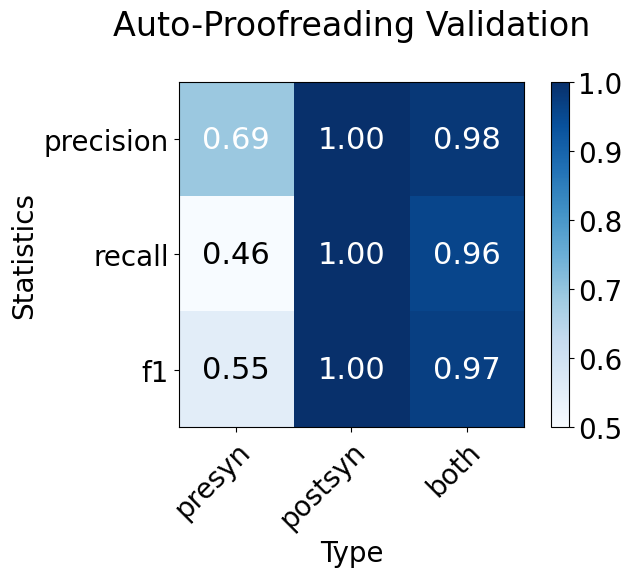

In [7]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [9]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Observations: The webbing not working

In [24]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(neuron_obj,
                                     axon_only = True,
                                #child_width_maximum = 75,
                                parent_width_maximum = 75,
                                plot_two_downstream_thin_axon_limb_branch = True,
                                plot_wide_angled_children = False,
                                error_if_web_is_none = True,
                                verbose = True,

                                #arguments for the web thresholding
                                web_size_threshold=120,
                                web_size_type="ray_trace_median",
                                web_above_threshold = True,

                                plot_web_errors = True,
                                    child_skeletal_threshold = 10000)

child_width_maximum= 200

 Working on visualization type: mesh


two_downstream_thin_axon_limb_branch = {'L1': array([  1,   4,   6,   9,  10,  17,  23,  37,  41,  46,  51,  56,  94,
       104, 109, 110, 112, 117, 118, 121, 122, 126, 127, 128, 130, 134,
       140, 141, 144, 146, 151, 162, 163, 165, 166, 170, 171, 181, 184,
       192, 195])}
wide_angled_children= {'L1': array([ 17, 118, 121, 127])}
Web size = 206.980246340241
Web size = 78.12315262448463
From limb L1, branch 118, Adding the downstream nodes [114, 124]  
Web size = 497.39915913093483
Web size = 280.570611038185
Final web t error limb branch dict = {'L1': [114, 124]}

 Working on visualization type: mesh


{'L1': [114, 124]}

In [25]:
import trimesh_utils as tu
tu.mesh_size(neuron_obj[1][17].web,size_type="ray_trace_median")

206.9857499827786

In [17]:
nru.classify_upstream_downsream(limb_obj,nru.find_branch_with_specific_coordinate(limb_obj,crossover_coordinates[0]))

(14, array([16, 21, 13]))

In [19]:
import networkx_utils as xu
xu.upstream_node(limb_obj.concept_network_directional,14)

17

In [20]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(L1 = [17]),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [23]:
nviz.plot_web_intersection(neuron_obj,
                           1,
                          17)

Web Mesh = <trimesh.Trimesh(vertices.shape=(15, 3), faces.shape=(23, 3))>, web_cdf = 0.405784 
web_bbox_rations = [1.3445139953170453, 1.5452721234491924, 1.1493165030869068], web_volume_ratio = 1.8406564072630354

Parent Node 17, n_boutons = 6
Parent_width (no_bouton_median)= 63.94886230101027
Parent_width (no_spine_median_mesh_center) = 68.30869549834118

Downstream Branch 14, n_boutons = 5

Downstream branch 14 width (no_spine_median_mesh_center) = 92.11161096627852
Downstream branch 14 width (no_bouton_median)= 88.95042864225928
child_angle = 91.43

Downstream Branch 15, n_boutons = 3

Downstream branch 15 width (no_spine_median_mesh_center) = 79.76305144409866
Downstream branch 15 width (no_bouton_median)= 75.25931090292309
child_angle = 72.73

sibling_angles = {15: 163.16}



# Inspecting why crossover did so poorly

In [10]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [11]:
exactly_equal = False
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

array([[739362.2379257 , 755282.28049686, 837120.94842382],
       [757592.2       , 833732.6       , 895872.9       ],
       [787292.53025783, 828441.87746682, 905316.83792025],
       [799756.10234805, 782527.18766394, 914202.55136582],
       [803886.38038943, 786535.47123104, 914856.36410602],
       [819453.11381016, 794624.32556351, 907465.33672463],
       [826317.37548501, 795791.15577087, 907156.49690573],
       [829643.66351225, 796038.36993706, 904979.77109465],
       [838092.55811061, 763729.2695726 , 940620.77990375],
       [840173.08532844, 857707.81483338, 931799.56775638],
       [873789.76567804, 771542.96056816, 895217.25287496],
       [896481.14056421, 813406.31397319, 885522.61444459]])

In [13]:
nviz.set_zoom(crossover_coordinates[0],
             radius = 20000)

In [ ]:
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = crossover_coordinates[1],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

In [ ]:
from importlib import reload
ed = reload(ed)

In [ ]:
import error_detection as ed
err_dict = ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                                        verbose = True,
                                                        match_method="best_match")

In [ ]:
neuron_obj["L1"][186]

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=err_dict,
                     mesh_whole_neuron=True
                     )

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj,1)

In [ ]:
import networkx_utils as xu
xu.downstream_nodes(neuron_obj[1].concept_network_directional,328)

In [ ]:
import numpy_utils as nu
ed.high_degree_upstream_match(
    limb_obj,
    coordinate = None,
    upstream_branch = 328,
    downstream_branches = np.array([330, 331, 333]),

    #arguments for the angle checking
    offset=1500,
    comparison_distance = 2000,
    worst_case_match_threshold = 65,
    plot_intermediates = True,
    plot_match_intermediates = True,

    #args for width matching
    width_diff_max = np.inf,#100,

    #args for definite pairs
    match_threshold = 45,
    angle_buffer = 15,
    
    max_degree_to_resolve = 6,
    axon_dependent = True,

    #args for picking the final winner
    match_method = "lowest_angle_sum", #other option is "best_match"
    verbose = True
    )

In [ ]:
import axon_utils as au
au.axon_width(neuron_obj[1][333])

In [ ]:
array([330, 331, 333])